In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_python(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="python",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/python_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (PYTHON, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (PYTHON, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_python(save_directory="./", split="train")

Resolving data files:   0%|          | 0/59 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/124 [00:00<?, ?it/s]

Saving the dataset (0/124 shards):   0%|          | 0/12866649 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (PYTHON, train) successfully downloaded and saved to './/python_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./python_train_dataset")

Loading dataset from disk:   0%|          | 0/124 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 12866649
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'public_data/serializers.py', 'max_stars_repo_name': 'MTES-MCT/sparte', 'max_stars_count': 0, 'id': '0', 'content': '<reponame>MTES-MCT/sparte\nfrom rest_framework_gis import serializers\nfrom rest_framework import serializers as s\n\nfrom .models import (\n    Artificialisee2015to2018,\n    Artificielle2018,\n    CommunesSybarval,\n    CouvertureSol,\n    EnveloppeUrbaine2018,\n    Ocsge,\n    Renaturee2018to2015,\n    Sybarval,\n    Voirie2018,\n    ZonesBaties2018,\n    UsageSol,\n)\n\n\ndef get_label(code="", label=""):\n    if code is None:\n        code = "-"\n    if label is None:\n        label = "inconnu"\n    return f"{code} {label[:30]}"\n\n\nclass Artificialisee2015to2018Serializer(serializers.GeoFeatureModelSerializer):\n    usage_2015 = s.SerializerMethodField()\n    usage_2018 = s.SerializerMethodField()\n    couverture_2015 = s.SerializerMethodField()\n    couverture_2018 = s.SerializerMethodField()\n\n    def get_usage_2015(self, obj):\n        

In [7]:
dataset = dataset.sort(column_names=["max_stars_count", "max_stars_repo_name"], reverse=[True, False])

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
from argparse import ArgumentParser, _HelpAction
from pkgutil import get_data
from sys import exit

# flie basename no extension
LICENSES = [
    "agpl-3.0",
    "apache-2.0",
    "bsd-2-clause",
    "bsd-3-clause",
    "epl-2.0",
    "gpl-2.0",
    "gpl-3.0",
    "lgpl-2.1",
    "lgpl-3.0",
    "mit",
    "mpl-2.0",
    "unlicenses",
    "996icu-0.1",
]


def getparser():
    parser = ArgumentParser(
        prog="gen-license",
        description="tools to create license file, support GitHub LICENSE code.",
    )

    parser.add_argument(
        "code", help="LICENSE Code, --list to see", choices=LICENSES,
        nargs="?", const=None
    )

    parser.add_argument(
        "--list", dest="list", help="Show supported LICENSE Codes", required=False,
        action="store_true"
    )

    parser.add_argument(
        "--996icu", dest="icu", help="Expand LICENSE with 996ICU LICENSE, Choose a language vesion or default zh-cn",
        required=False, nargs="?", const="zh-cn"

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Example 0:
from argparse import ArgumentParser, _HelpAction
from pkgutil import get_data
from sys import exit

# flie basename no extension
LICENSES = [
    "agpl-3.0",
    "apache-2.0",
    "bsd-2-clause",
    "bsd-3-clause",
    "epl-2.0",
    "gpl-2.0",
    "gpl-3.0",
    "lgpl-2.1",
    "lgpl-3.0",
    "mit",
    "mpl-2.0",
    "unlicenses",
    "996icu-0.1",
]


def getparser():
    parser = ArgumentParser(
        prog="gen-license",
        description="tools to create license file, support GitHub LICENSE code.",
    )

    parser.add_argument(
        "code", help="LICENSE Code, --list to see", choices=LICENSES,
        nargs="?", const=None
    )

    parser.add_argument(
        "--list", dest="list", help="Show supported LICENSE Codes", required=False,
        action="store_true"
    )

    parser.add_argument(
        "--996icu", dest="icu", help="Expand LICENSE with 996ICU LICENSE, Choose a language vesion or default zh-cn",
        required=False, nargs="?", const="zh-cn"

In [10]:
sliced_dataset = dataset[:2500000]

In [11]:
del dataset

In [12]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [13]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     3.112980e+01
std      8.800531e+00
min      6.666667e-01
25%      2.554167e+01
50%      3.077778e+01
75%      3.603093e+01
max      1.252000e+02
Name: avg_line_length, dtype: float64


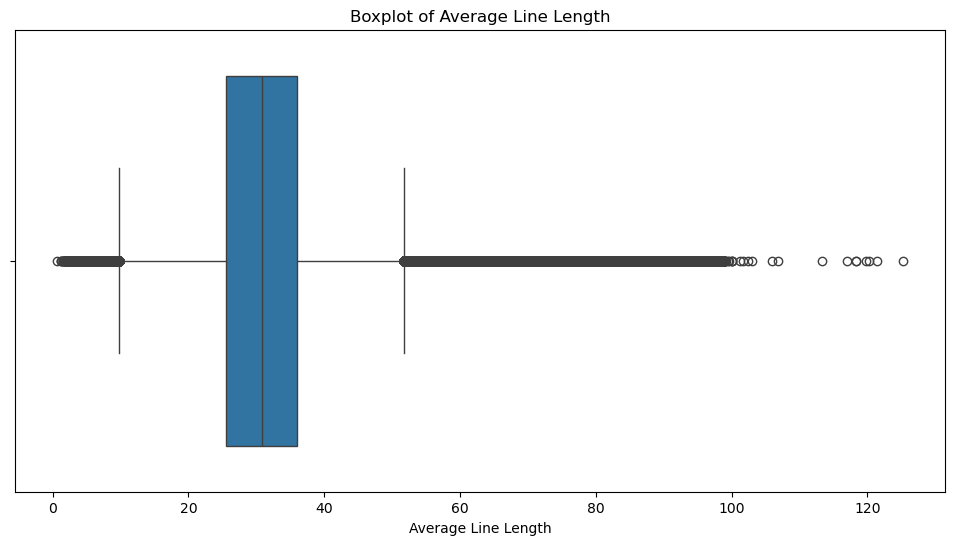

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [15]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 54532


In [17]:
outliers['avg_line_length'].describe()

count    54532.000000
mean        52.571576
std         20.955035
min          0.666667
25%         52.632847
50%         55.793607
75%         62.000000
max        125.200000
Name: avg_line_length, dtype: float64

In [18]:
df.drop(outliers.index, inplace=True)

In [19]:
df['avg_line_length'].describe()

count    2.445468e+06
mean     3.065167e+01
std      7.674895e+00
min      9.809524e+00
25%      2.549206e+01
50%      3.063218e+01
75%      3.570588e+01
max      5.176471e+01
Name: avg_line_length, dtype: float64

In [20]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

37.0

In [21]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.445468e+06
mean     1.385783e+02
std      3.559914e+02
min      1.000000e+00
25%      2.900000e+01
50%      6.700000e+01
75%      1.500000e+02
max      7.455100e+04
Name: line_count, dtype: float64

In [22]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [23]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1544537
Number of examples with line count in range 101-200: 465364
Number of examples with line count in range 201-300: 186112
Number of examples with line count in range 301-400: 91379
Number of examples with line count in range 401-500: 50533
Number of examples with line count in range 501-600: 30436
Number of examples with line count in range 601-700: 19614
Number of examples with line count in range 701-800: 13167
Number of examples with line count in range 801-900: 9431
Number of examples with line count in range 901-1000: 6825
Number of examples with line count in range 1000+: 28070


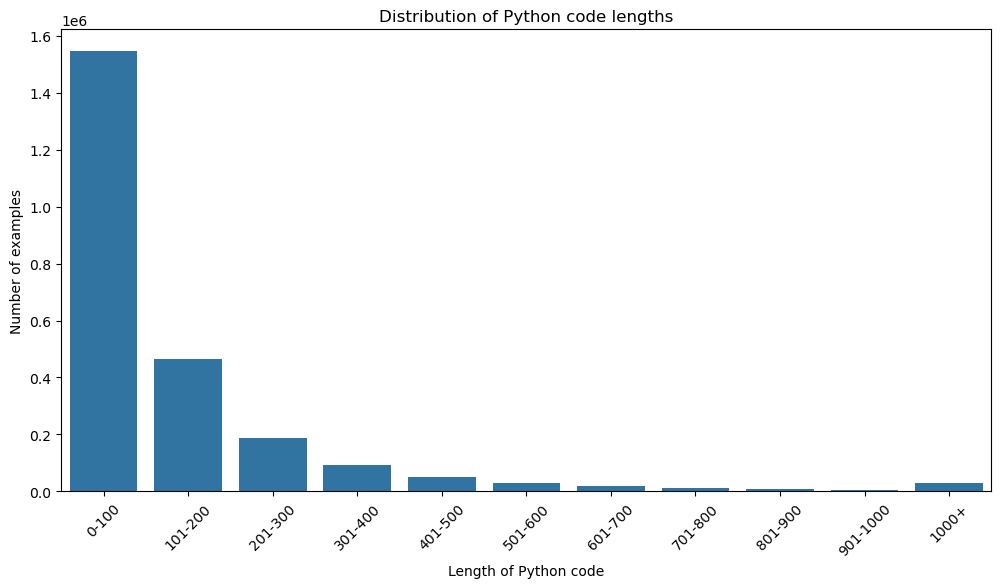

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of Python code lengths")
plt.xlabel("Length of Python code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1544537,1544537,63.159158,63.159158
1,101-200,465364,2009901,19.029650,82.188808
2,201-300,186112,2196013,7.610486,89.799294
3,301-400,91379,2287392,3.736667,93.535961
4,401-500,50533,2337925,2.066394,95.602355
5,501-600,30436,2368361,1.244588,96.846943
6,601-700,19614,2387975,0.802055,97.648998
7,701-800,13167,2401142,0.538425,98.187423
8,801-900,9431,2410573,0.385652,98.573075
9,901-1000,6825,2417398,0.279088,98.852162


In [26]:
np.percentile(df['line_count'], 90)

304.0

In [27]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [28]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,"from argparse import ArgumentParser, _HelpActi...",21.828571,105
1,"<reponame>vegYY/react\n{\n ""targets"": [\n ...",15.588235,17
2,<reponame>EricRemmerswaal/tensorflow<filename>...,40.898158,923
3,# Copyright 2021 The TensorFlow Authors. All R...,34.339623,53
4,<reponame>EricRemmerswaal/tensorflow<gh_stars>...,36.655172,58


In [29]:
df_filtered.shape

(2445468, 3)

In [30]:
df_filtered = df_filtered[df_filtered['line_count'] <= 300]
df_filtered.shape

(2196013, 3)

In [31]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 37]
df_filtered.shape

(1808818, 3)

In [32]:
df_filtered.head()

,content,avg_line_length,line_count
0,"from argparse import ArgumentParser, _HelpActi...",21.828571,105
1,"<reponame>vegYY/react\n{\n ""targets"": [\n ...",15.588235,17
3,# Copyright 2021 The TensorFlow Authors. All R...,34.339623,53
4,<reponame>EricRemmerswaal/tensorflow<gh_stars>...,36.655172,58
5,# Copyright 2021 The TensorFlow Authors. All R...,32.333333,45


In [33]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.445468e+06  2.445468e+06
mean      3.065167e+01  1.385783e+02
std       7.674895e+00  3.559914e+02
min       9.809524e+00  1.000000e+00
25%       2.549206e+01  2.900000e+01
50%       3.063218e+01  6.700000e+01
75%       3.570588e+01  1.500000e+02
max       5.176471e+01  7.455100e+04

       avg_line_length    line_count
count     1.808818e+06  1.808818e+06
mean      2.762792e+01  7.350773e+01
std       5.809639e+00  6.622066e+01
min       9.809524e+00  1.000000e+00
25%       2.381818e+01  2.400000e+01
50%       2.834194e+01  5.100000e+01
75%       3.220408e+01  1.030000e+02
max       3.700000e+01  3.000000e+02


In [34]:
data_dict_python = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_python[f"python_{i}"] = example

In [35]:
assert len(data_dict_python) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [36]:
for i, (k,v) in enumerate(data_dict_python.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example python_0:
from argparse import ArgumentParser, _HelpAction
from pkgutil import get_data
from sys import exit

# flie basename no extension
LICENSES = [
    "agpl-3.0",
    "apache-2.0",
    "bsd-2-clause",
    "bsd-3-clause",
    "epl-2.0",
    "gpl-2.0",
    "gpl-3.0",
    "lgpl-2.1",
    "lgpl-3.0",
    "mit",
    "mpl-2.0",
    "unlicenses",
    "996icu-0.1",
]


def getparser():
    parser = ArgumentParser(
        prog="gen-license",
        description="tools to create license file, support GitHub LICENSE code.",
    )

    parser.add_argument(
        "code", help="LICENSE Code, --list to see", choices=LICENSES,
        nargs="?", const=None
    )

    parser.add_argument(
        "--list", dest="list", help="Show supported LICENSE Codes", required=False,
        action="store_true"
    )

    parser.add_argument(
        "--996icu", dest="icu", help="Expand LICENSE with 996ICU LICENSE, Choose a language vesion or default zh-cn",
        required=False, nargs="?", const=

In [37]:
import json

with open('python_train.json', 'w') as f:
    json.dump(data_dict_python, f)
    print("Saved to 'python_train.json'")

Saved to 'python_train.json'
